In [2]:
import sys
import os
import numpy as np
import pandas as pd
import pyrosetta
import seaborn as sns
import matplotlib.pyplot as plt
from pyrosetta import *
from pyrosetta import rosetta
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = 5,5
plt.rcParams['axes.linewidth'] = 4.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [4]:
init()

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python310.ubuntu 2024.19+release.a34b73c40fe9c61558d566d6a63f803cfb15a4fc 2024-05-02T16:22:03] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python310.ubuntu r381 2024.19+release.a34b73c40f a34b73c40f

### Import Data

In [5]:
df_tm=pd.read_csv("/home/cadeniran/ipn/data/tm.csv", header=0, sep=',', engine='python')
df_per=pd.read_csv("/home/cadeniran/ipn/data/peripheral.csv", header=0, sep=',', engine='python')

In [6]:
df_tm['Hydrophobic_SA'].describe()

count       903.000000
mean      24313.065170
std       16507.106045
min        2842.379806
25%       12919.761488
50%       18467.893526
75%       32400.556748
max      100172.468857
Name: Hydrophobic_SA, dtype: float64

In [7]:
df_per['Hydrophobic_SA'].describe()

count      518.000000
mean      8642.077830
std       6125.783964
min       1263.109906
25%       4287.074204
50%       7178.530778
75%      10221.887332
max      58801.538957
Name: Hydrophobic_SA, dtype: float64

In [8]:
df_tm['Total_SA'].describe()

count       903.000000
mean      35857.574996
std       26475.519193
min        5592.329574
25%       17399.713068
50%       25955.635247
75%       47442.403177
max      151960.057229
Name: Total_SA, dtype: float64

In [9]:
df_per['Total_SA'].describe()

count      518.000000
mean     14950.325672
std      10255.110072
min       2437.284015
25%       7706.960980
50%      12226.291542
75%      17836.504927
max      93663.992013
Name: Total_SA, dtype: float64

In [10]:
df_tm['fa_sol'].describe()

count      903.000000
mean      3102.093710
std       2490.187757
min        323.788674
25%       1393.337339
50%       2020.206702
75%       4063.632010
max      15652.573029
Name: fa_sol, dtype: float64

In [11]:
df_per['fa_sol'].describe()

count     518.000000
mean     1354.023551
std       992.367462
min       146.104497
25%       694.019768
50%      1197.284474
75%      1580.117086
max      9391.071576
Name: fa_sol, dtype: float64

### Plot hydrophobic

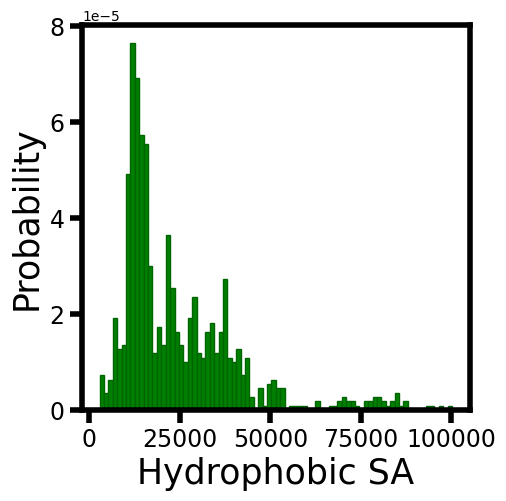

In [12]:
# TM proteins
x = df_tm['Hydrophobic_SA']

plt.hist(x, density=True, bins=80, color='g', edgecolor = 'darkgreen')
plt.xlabel("Hydrophobic SA", fontsize=25)
plt.ylabel("Probability", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=4)
plt.autoscale()
plt.savefig("./figs/hist1.png", transparent=True, bbox_inches='tight')

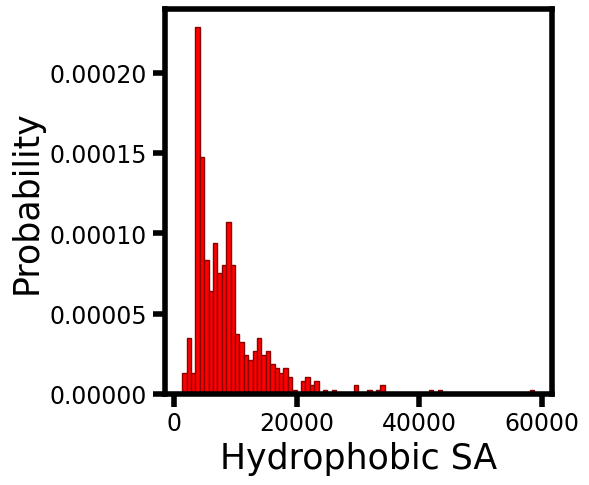

In [13]:
# Peripheral proteins
x = df_per['Hydrophobic_SA']

plt.hist(x, density=True, bins=80, color='r', edgecolor = 'darkred')
plt.xlabel("Hydrophobic SA", fontsize=25)
plt.ylabel("Probability", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=4)
plt.autoscale()
plt.autoscale()
plt.savefig("./figs/hist2.png", transparent=True, bbox_inches='tight')

### Plot Total SA

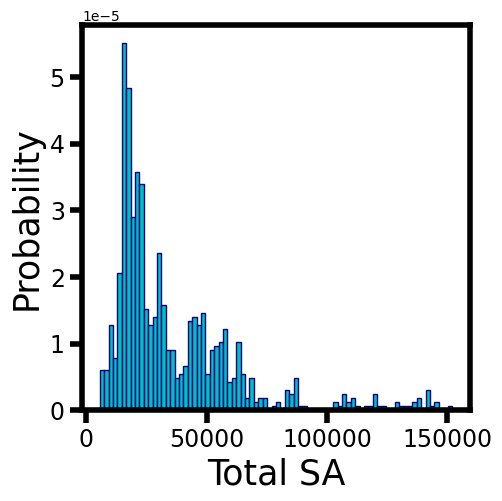

In [14]:
# TM proteins
x = df_tm['Total_SA']

plt.hist(x, density=True, bins=80, color='c', edgecolor = 'navy')
plt.xlabel("Total SA", fontsize=25)
plt.ylabel("Probability", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=4)
plt.autoscale()
plt.savefig("./figs/hist3.png", transparent=True, bbox_inches='tight')

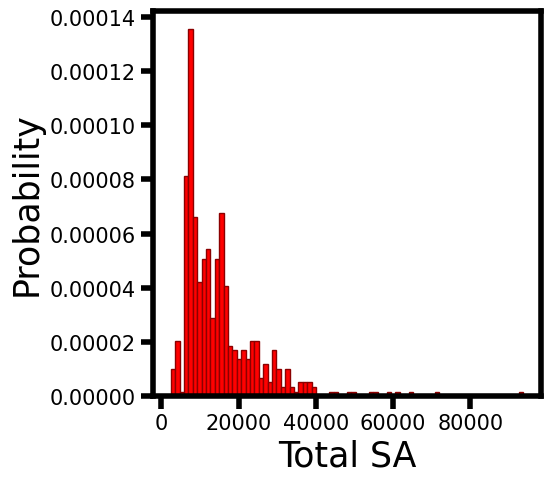

In [15]:
# Peripheral proteins
x = df_per['Total_SA']

plt.hist(x, density=True, bins=80, color='r', edgecolor = 'darkred')
plt.xlabel("Total SA", fontsize=25)
plt.ylabel("Probability", fontsize=25)
plt.tick_params(axis='both', labelsize='15', length=9, width=4)
plt.autoscale()
plt.savefig("./figs/hist4.png", transparent=True, bbox_inches='tight')

### Plot fa_sol

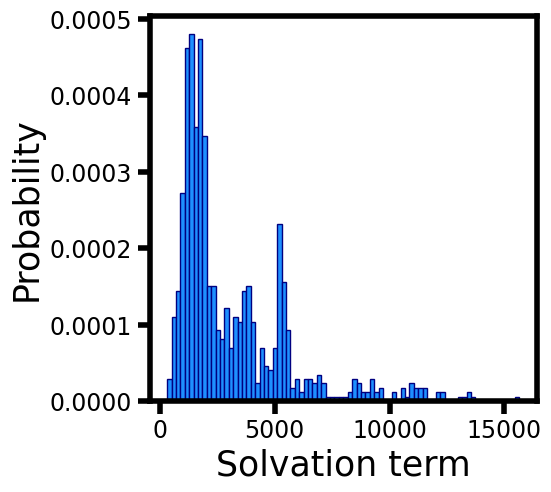

In [16]:
# TM proteins
x = df_tm['fa_sol']

plt.hist(x, density=True, bins=80, color='dodgerblue', edgecolor = 'navy')
plt.xlabel("Solvation term", fontsize=25)
plt.ylabel("Probability", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=4)
plt.autoscale()
plt.savefig("./figs/hist5.png", transparent=True, bbox_inches='tight')

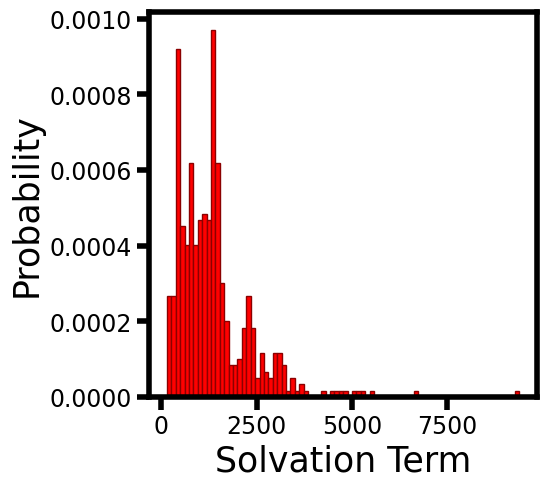

In [17]:
# Peripheral proteins
x = df_per['fa_sol']

plt.hist(x, density=True, bins=80, color='r', edgecolor = 'darkred')
plt.xlabel("Solvation Term", fontsize=25)
plt.ylabel("Probability", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=4)
plt.autoscale()
plt.autoscale()
plt.savefig("./figs/hist6.png", transparent=True, bbox_inches='tight')

In [25]:
os.chdir("/home/cadeniran/ipn/data")

In [28]:
df_tm[['pdbid','Hydrophobic_SA']].to_csv('hydrophibocSA', sep=' ', index=False, header=False)

In [27]:
df_tm[['pdbid','Total_SA']].to_csv('totalSA', sep=' ', index=False, header=False)

In [29]:
df_tm[['pdbid','fa_sol']].to_csv('fasol', sep=' ', index=False, header=False)

In [ ]:
data_path="/home/cadeniran/u1"
dfile="5klb_A.pdb"
pose = rosetta.core.pose.Pose()
rosetta.core.import_pose.pose_from_file(pose, os.path.join(data_path, dfile))
rsd_sasa = pyrosetta.rosetta.utility.vector1_double()
rsd_hydrophobic_sasa = pyrosetta.rosetta.utility.vector1_double()
atom_sasa = pyrosetta.rosetta.core.id.AtomID_Map_double_t()

In [ ]:
rosetta.core.scoring.calc_per_res_hydrophobic_sasa(pose, rsd_sasa, rsd_hydrophobic_sasa, 1.4)

In [ ]:
rosetta.core.scoring.calc_per_atom_sasa(pose, atom_sasa, rsd_sasa, 1.4)

In [ ]:
atom_sasa

In [ ]:
sum(rsd_hydrophobic_sasa)

In [ ]:
rosetta.core.scoring.calc_per_res_hydrophobic_sasa(pose, rsd_sasa, rsd_hydrophobic_sasa, 1.4)
#print(rsd_hydrophobic_sasa)

In [ ]:
rosetta.core.scoring.calc_per_atom_sasa(pose, atom_sasa, rsd_sasa, 1.4

In [ ]:
print(rsd_hydrophobic_sasa)

In [ ]:
sfxn=get_score_function(True)

In [ ]:
get_fa_scorefxn().show(pose)

In [ ]:
# Testing

In [ ]:
scorefxn=get_fa_scorefxn()

In [ ]:
scorefxn.show(pose)

In [ ]:
from pyrosetta.teaching import *
scfxn = ScoreFunction()

In [ ]:
scfxn.set_weight(fa_rep, 0.550)

In [ ]:
scfxn.get_weight(fa_rep)

In [ ]:
scfxn.show(pose)

In [ ]:
scfxn.score(pose)